In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import nltk 
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm # progressbar tracker  when do some loops on the data


import warnings
warnings.filterwarnings('ignore')

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tmost\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\tmost\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [5]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\tmost\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [6]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\tmost\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [21]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tmost\AppData\Roaming\nltk_data...


True

In [7]:
df = pd.read_csv('C:/Users/tmost/Documents/Data-course/NLP_SemanticAnalysis/Reviews.csv')
df = df.head(1000)

In [8]:
df.shape

(1000, 10)

In [9]:
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [10]:
df['Summary'][0]

'Good Quality Dog Food'

# EDA

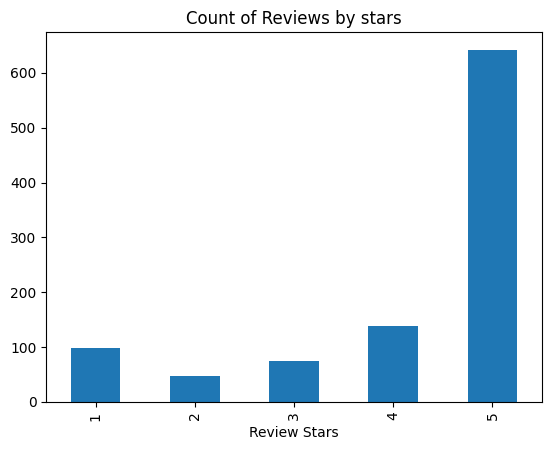

In [11]:
# Count of Reviews by stars

ax = df.Score.value_counts().sort_index().plot(kind='bar', title='Count of Reviews by stars')

ax.set_xlabel('Review Stars')
plt.show()

# Basic NLTK

In [26]:
example = df['Text'][36]
print(example)

For those of us with celiac disease this product is a lifesaver and what could be better than getting it at almost half the price of the grocery or health food store!  I love McCann's instant oatmeal - all flavors!!!<br /><br />Thanks,<br />Abby


- what nltk can do?
- nltk can tokenize this sentences

In [27]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['For',
 'those',
 'of',
 'us',
 'with',
 'celiac',
 'disease',
 'this',
 'product',
 'is']

In [28]:
tokens1 =nltk.sent_tokenize(example)

In [29]:
tokens1

['For those of us with celiac disease this product is a lifesaver and what could be better than getting it at almost half the price of the grocery or health food store!',
 "I love McCann's instant oatmeal - all flavors!!",
 '!<br /><br />Thanks,<br />Abby']

In [30]:
# part-of-speech tagging using the nltk.pos_tag() function.
#https://pythonexamples.org/nltk-pos-tagging/

tagged = nltk.pos_tag(tokens)
tagged[:10]

[('For', 'IN'),
 ('those', 'DT'),
 ('of', 'IN'),
 ('us', 'PRP'),
 ('with', 'IN'),
 ('celiac', 'JJ'),
 ('disease', 'NN'),
 ('this', 'DT'),
 ('product', 'NN'),
 ('is', 'VBZ')]

In [31]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  For/IN
  those/DT
  of/IN
  us/PRP
  with/IN
  celiac/JJ
  disease/NN
  this/DT
  product/NN
  is/VBZ
  a/DT
  lifesaver/NN
  and/CC
  what/WP
  could/MD
  be/VB
  better/JJR
  than/IN
  getting/VBG
  it/PRP
  at/IN
  almost/RB
  half/PDT
  the/DT
  price/NN
  of/IN
  the/DT
  grocery/NN
  or/CC
  health/NN
  food/NN
  store/NN
  !/.
  I/PRP
  love/VBP
  (PERSON McCann/NNP)
  's/POS
  instant/JJ
  oatmeal/NN
  -/:
  all/DT
  flavors/NNS
  !/.
  !/.
  !/.
  </JJ
  br/NN
  //NNP
  >/NNP
  </NNP
  br/NN
  //NNP
  >/NNP
  Thanks/NNP
  ,/,
  </NNP
  br/NN
  //NNP
  >/NNP
  Abby/NNP)


# step 1. VADER Sentiment Scoring

- VADER = (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach


- We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.


- This uses a "bag of words" approach:

- Stop words are removed

- Each word is scored and combined to a total score.

- take all the words in a sentence and it has a value for wither positive, negative or neutral for each words and combines them just like a math equation and tell how pos, neg, neut that statement

- this approach does not account for relationship between words which in human speech is very important, but at leasr it's a good start.

- remove the stop words (no meaning, it's just for the structure of the sentences)

In [32]:
# sentiment anlyzer object
sia = SentimentIntensityAnalyzer()

In [33]:
sia.polarity_scores('I am so happy!')  #compound is the average from negative one to positive one 

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [34]:
sia.polarity_scores('this is the worst things ever') # compound is more on negative side than positive

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [35]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.754, 'pos': 0.246, 'compound': 0.9196}

# Run the polarity score on the entire dataset

In [41]:
res = {} # dic for store the results of the sentiment analysis for each row.

for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [44]:
# Convert dictionary to dataframe

pd.DataFrame(res).T

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
996,0.026,0.721,0.253,0.9788
997,0.000,0.786,0.214,0.9309
998,0.000,0.673,0.327,0.9634
999,0.063,0.874,0.062,-0.0129


In [49]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders = vaders.merge(df, how='left')

In [50]:
vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0.026,0.721,0.253,0.9788,B006F2NYI2,A1D3F6UI1RTXO0,Swopes,1,1,5,1331856000,Hot & Flavorful,BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...
996,997,0.000,0.786,0.214,0.9309,B006F2NYI2,AF50D40Y85TV3,Mike A.,1,1,5,1328140800,Great Hot Sauce and people who run it!,"Man what can i say, this salsa is the bomb!! i..."
997,998,0.000,0.673,0.327,0.9634,B006F2NYI2,A3G313KLWDG3PW,kefka82,1,1,5,1324252800,this sauce is the shiznit,this sauce is so good with just about anything...
998,999,0.063,0.874,0.062,-0.0129,B006F2NYI2,A3NIDDT7E7JIFW,V. B. Brookshaw,1,2,1,1336089600,Not Hot,Not hot at all. Like the other low star review...


In [52]:
# Now we have sentiment score and metadata
vaders.head(3)

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


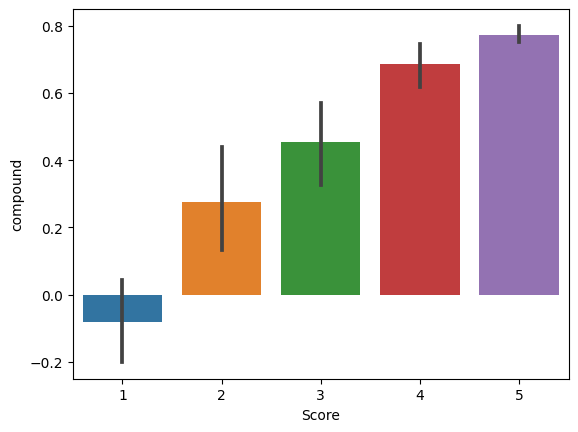

In [53]:
sns.barplot(data=vaders, x='Score',y='compound')
ax.set_title('Compund core by Amazon Star Review')
plt.show()

**Observatuin**

- One score review has lower compund Score and five star review is higher